Построить алгоритм метода престрелки

$\left\{ 
    \begin{gathered}
        y'' - x \sqrt{y} = 0,\quad 0 \geqslant x \geqslant 1\\ 
        y(0) = 0, y(1) = 2 \\ 
    \end{gathered}
\right.$

In [14]:
import numpy
import math
import matplotlib.pyplot as plt

In [15]:
x = [0, 1]
y = [0, 2]
con = 2
y_0 = 0
err = 1e-6
h = 0.1

In [16]:
def f(x, y):
    return x * y**(1/2)

def foo(x, q, f):
    y = q[0]
    y1 = q[1]
    return numpy.array([y1, f(x, y)])


def rung_k(h, q_0, x, f):
    xes = numpy.arange(x[0], x[1], h)
    q = []
    q.append(q_0)
    for i in range(1, len(xes) + 1):
        xees = x[0] + (i - 1) * h
        f1 = foo(xees, q[-1], f)
        f2 = foo(xees + h * 0.5, q[-1] + 0.5 * h *  f1, f)
        f3 = foo(xees + h * 0.5, q[-1]  + 0.5 * h * f2, f)
        f4 = foo(xees + h, q[-1] + h * f3, f)
        q.append(q[-1] + (1/6) * h * (f1 + 2 * f2 + 2 * f3 + f4))
    return q


In [17]:
def sol(a, x, h, y_0, f):
    q = rung_k(h, numpy.array([y_0, a]), x, f)
    y = [q[i][0] for i in range(len(q))]
    y1 = [q[i][1] for i in range(len(q))]
    return y, y1

def diff(y):
    return y[-1] - con

def change_interval(a_mid, d_mid, a, diff):
    if diff[1] * d_mid > 0:
        diff[1] = d_mid
        a[1] = a_mid
    else:
        diff[0] = d_mid
        a[0] = a_mid
    return a, d    

In [18]:
def graph(x, solution):
    h = (x[1] - x[0]) / (len(solution) - 1)
    xes = numpy.arange(x[0], x[1] + h/2 , h)
    plt.plot(xes, solution)
    plt.grid()
    plt.show()


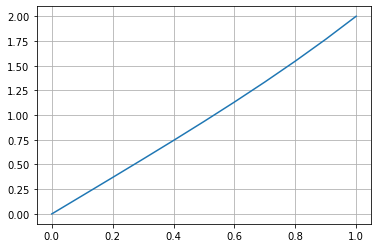

In [19]:
a = [0, 2]
y_1, y1_1 = sol(a[0], x, h, y_0, f)
y_2, y1_2 = sol(a[1], x, h, y_0, f)
d = list([diff(y_1), diff(y_2)])
y = y_1

while(abs(diff(y)) >= err):  # деление пополам
    a_mid = sum(a) / len(a)
    y, v = sol(a_mid, x, h, y_0, f)
    d_mid = diff(y)
    a, d = change_interval(a_mid, d_mid, a, d)

graph(x, y)